<a href="https://colab.research.google.com/github/NaufalNurFahriza/Machine-Learning-Terapan-Predictive-Analytics-dicoding/blob/main/PredictiveAnalytics_notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Machine Learning Terapan: Analisis Prediktif

Dataset yang digunakan dalam proyek machine learning terapan ini adalah "Diabetes Dataset" yang tersedia di platform [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset).

# Import Library

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Importing Dataset

In [ ]:
# Upload kaggle.json yang didapatkan dari akun Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naufalnurfahriza","key":"ec6f7ab7dabebc9fd0600384aa1880de"}'}

In [ ]:
# Buat direktori dan ubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

# Unzip dataset
!unzip diabetes-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
Archive:  diabetes-dataset.zip
  inflating: diabetes.csv            


Dataset sudah diimport dan sudah diekstrak

In [ ]:
# Membuat dataset menjadi dataframe dengan nama 'df'
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [ ]:
# Preview dataframe dari dataset yang sudah dibuat
print("\nPreview data:")
print(df.head())



Preview data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# 3. Eksplorasi Data Awal

In [ ]:
print("\nInformasi dataset:")
print("Jumlah baris dan kolom:", df.shape)
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())


Informasi dataset:
Jumlah baris dan kolom: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistik deskriptif:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean   

In [ ]:
print("\nPengecekan missing values:")
print(df.isnull().sum())


Pengecekan missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# 4. Preprocessing Data

In [ ]:
print("\nPengecekan duplikat:")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {duplicate_rows.shape[0]}")


Pengecekan duplikat:
Jumlah baris duplikat: 0


# 5. Visualisasi Data


=== VISUALISASI DATA ===


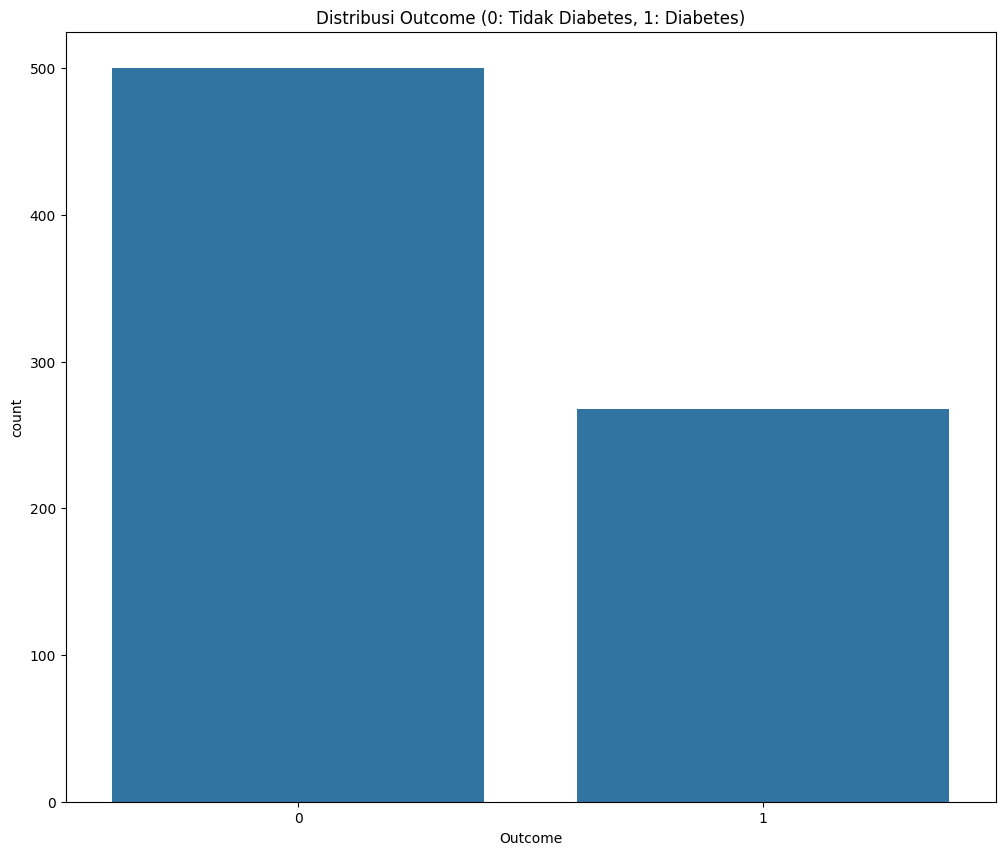

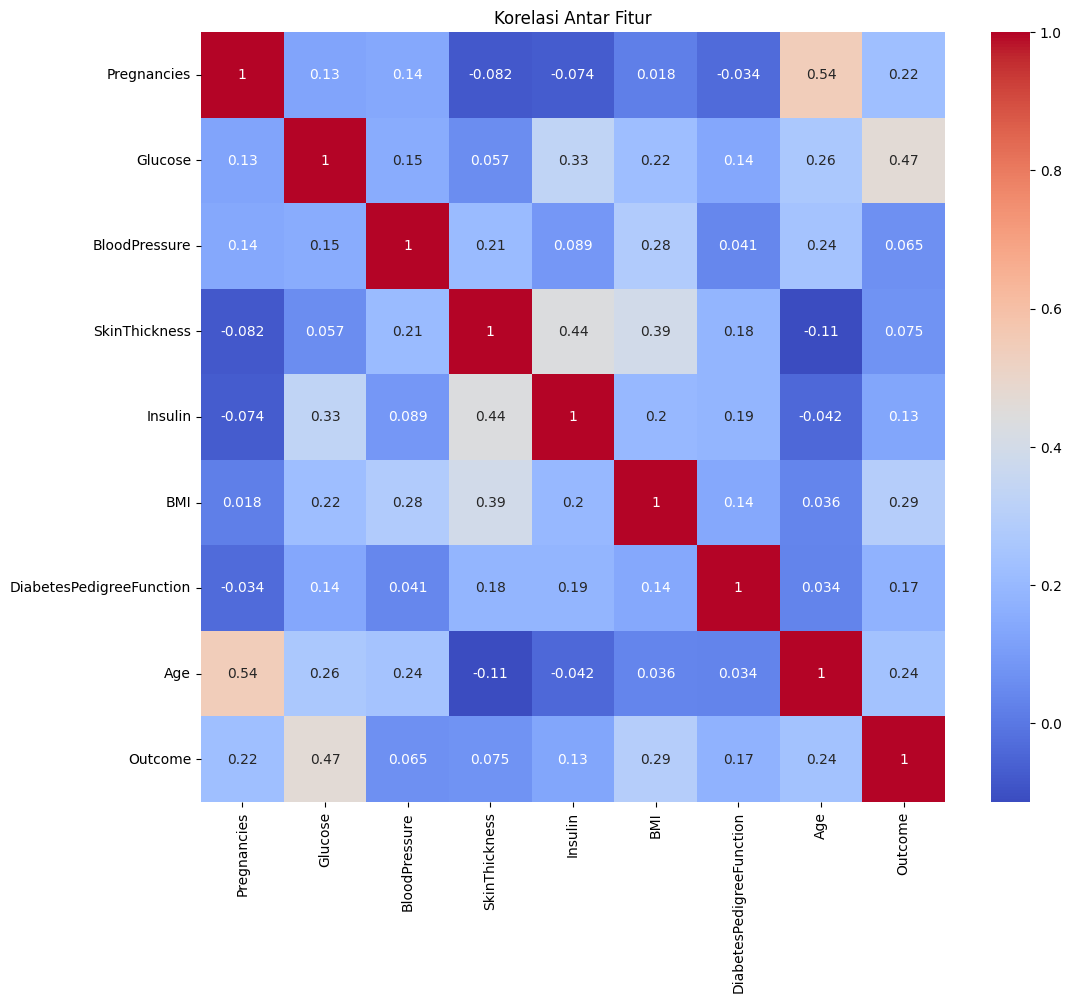

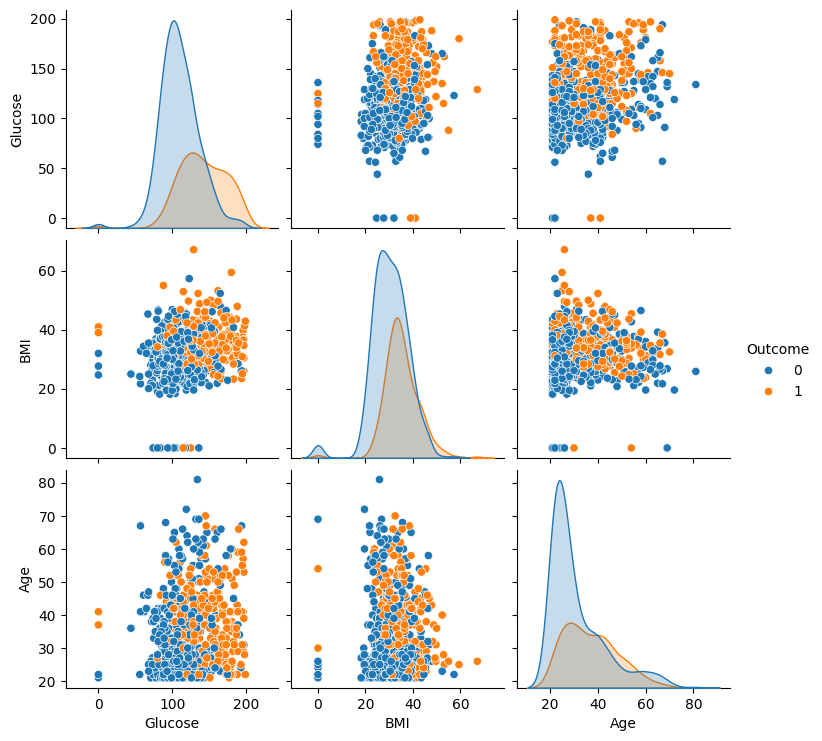

In [ ]:
print("\n=== VISUALISASI DATA ===")
plt.figure(figsize=(12, 10))

sns.countplot(x='Outcome', data=df)
plt.title("Distribusi Outcome (0: Tidak Diabetes, 1: Diabetes)")
plt.show()

plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

# Pairplot untuk beberapa fitur utama
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.show()

In [ ]:
# 6. Preprocessing Data
# Memisahkan fitur dan target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# 7. Modeling
# Model 1: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model 3: SVM
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# 8. Evaluasi Model
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred))
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231

Akurasi: 0.7445887445887446
Confusion Matrix:
[[130  20]
 [ 39  42]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231

Akurasi: 0.7532467532467533
Confusion Matrix:
[[130  20]
 [ 37  44]]

=== SVM ===
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54 